## Introduction

My decision was based off the fact that I am a gamer and I have recently found out that watching other gamers play their games is very interesting

In [33]:
import pandas as pd

In [34]:
data= pd.read_csv('twitchdata-update.csv', header='infer')

In [35]:
data

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


In [36]:
data['Language'].unique()

array(['English', 'Portuguese', 'Spanish', 'German', 'Korean', 'French',
       'Russian', 'Japanese', 'Chinese', 'Czech', 'Turkish', 'Italian',
       'Polish', 'Thai', 'Arabic', 'Slovak', 'Other', 'Hungarian',
       'Greek', 'Finnish', 'Swedish'], dtype=object)

In [37]:
data['Language'] = data['Language'].replace(['Portuguese', 'Spanish', 'German', 'Korean', 'French',
       'Russian', 'Japanese', 'Chinese', 'Czech', 'Turkish', 'Italian',
       'Polish', 'Thai', 'Arabic', 'Slovak', 'Other', 'Hungarian',
       'Greek', 'Finnish', 'Swedish'],'Non-English')

In [38]:
data['Mature'] = data['Mature'].replace([True], 1)

In [39]:
data['Mature'] = data['Mature'].replace([False], 0)

In [40]:
data['Partnered'] = data['Partnered'].replace([True], 1)

In [41]:
data['Partnered'] = data['Partnered'].replace([False], 0)

In [42]:
data['Language'] = data['Language'].replace(['English'], 1)

In [43]:
data['Language'] = data['Language'].replace(['Non-English'], 0)

In [44]:
data['Followers'].where(data['Followers'] > 1000000, 0, inplace=True)

In [45]:
data['Followers'].where(data['Followers'] <= 1000000, 1, inplace=True)

In [46]:
data['Peak viewers'].where(data['Peak viewers'] <= 100000, 1, inplace=True)

In [47]:
data['Average viewers'].where(data['Average viewers'] > 10000, 0, inplace=True)

In [48]:
data['Average viewers'].where(data['Average viewers'] <= 10000, 1, inplace=True)

In [49]:
data

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,1,1,1,1734810,93036735,1,0,1
1,summit1g,6091677300,211845,1,1,1,1370184,89705964,1,0,1
2,Gaules,5644590915,515280,1,1,1,1023779,102611607,1,1,0
3,ESL_CSGO,3970318140,517740,1,0,1,703986,106546942,1,0,1
4,Tfue,3671000070,123660,1,1,1,2068424,78998587,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,0,0,562691,2162107,1,0,0
996,빅헤드 (bighead033),122523705,153000,3940,0,0,52289,4399897,1,0,0
997,마스카 (newmasca),122452320,217410,6431,0,0,-4942,3417970,1,0,0
998,AndyMilonakis,122311065,104745,10543,0,0,109111,3926918,1,0,1


## Building the Decision Tree Classifier 

In [50]:
from sklearn import tree

In [51]:
y = data['Followers']

In [52]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Followers, Length: 1000, dtype: int64

In [53]:
X = data.drop(['Channel','Watch time(Minutes)','Stream time(minutes)','Followers','Followers gained','Views gained','Followers gained','Views gained','Partnered'], axis = 1)

In [54]:
X

,Peak viewers,Average viewers,Mature,Language
0,1,1,0,1
1,1,1,0,1
2,1,1,1,0
3,1,0,0,1
4,1,1,0,1
...,...,...,...,...
995,21359,0,0,0
996,3940,0,0,0
997,6431,0,0,0
998,10543,0,0,1


In [55]:
type(y)

pandas.core.series.Series

In [56]:
type(X)

pandas.core.frame.DataFrame

In [57]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [58]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [59]:
clf = clf.fit(X,y)

# Plot the results of the tree

In [60]:
import pydotplus

In [61]:
from IPython.display import Image

In [62]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['1M Followers','Less than 1M'], filled=True, out_file=None)

In [63]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [158]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

wandb: Network error resolved after 0:02:33.543440, resuming normal operation.


# Using the Decision Tree to Classify new Datasets

In [65]:
testData = [['Dalinar', 1,1,0,1,'1M Followers'], ['Kelek',0,1,1,1,'Less than 1M'], ['Waxillium', 1,0,0,0,'Less than 1M'], ['Marasi',0,1,0,0,'1M Followers']]

In [66]:
testData

[['Dalinar', 1, 1, 0, 1, '1M Followers'],
 ['Kelek', 0, 1, 1, 1, 'Less than 1M'],
 ['Waxillium', 1, 0, 0, 0, 'Less than 1M'],
 ['Marasi', 0, 1, 0, 0, '1M Followers']]

In [67]:
testData=pd.DataFrame(testData, columns=['Name','Peak viewers','Average viewers','Mature','Language','Followers'])

In [68]:
testData

,Name,Peak viewers,Average viewers,Mature,Language,Followers
0,Dalinar,1,1,0,1,1M Followers
1,Kelek,0,1,1,1,Less than 1M
2,Waxillium,1,0,0,0,Less than 1M
3,Marasi,0,1,0,0,1M Followers


In [69]:
testY=testData['Followers']

In [70]:
testY

0    1M Followers
1    Less than 1M
2    Less than 1M
3    1M Followers
Name: Followers, dtype: object

In [71]:
testX=testData.drop(['Name', 'Followers'], axis=1)

In [72]:
testX

,Peak viewers,Average viewers,Mature,Language
0,1,1,0,1
1,0,1,1,1
2,1,0,0,0
3,0,1,0,0


In [73]:
predY=clf.predict(testX)

In [74]:
type(predY)

numpy.ndarray

In [75]:
predY

array([1, 1, 0, 1], dtype=int64)

In [76]:
predictions=pd.concat([testData['Name'],testData['Followers'], pd.Series(predY, name='Predicted Followers')], axis=1)

In [77]:
predictions

,Name,Followers,Predicted Followers
0,Dalinar,1M Followers,1
1,Kelek,Less than 1M,1
2,Waxillium,Less than 1M,0
3,Marasi,1M Followers,1


In [78]:
from sklearn.metrics import accuracy_score
import numpy as np

In [79]:
predY


array([1, 1, 0, 1], dtype=int64)

In [81]:
predY = np.select([predY==1, predY==0], ["1M Followers", "Less than 1M"], predY)

In [80]:
predY


array([1, 1, 0, 1], dtype=int64)

In [82]:
print('Accuracy on data is %.2f'%(accuracy_score(testY,predY)*100.))

Accuracy on data is 75.00


# Logistic Regression

Filter unnecessary warnings

In [83]:
import warnings
warnings.filterwarnings("ignore")

In [84]:
import numpy as np
import pandas as pd

# Seeding

In [85]:
np.random.seed(5)

# Read the Data

In [86]:
lgdata = pd.read_csv('twitchdata-update.csv', header = 'infer')

In [87]:
lgdata.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Channel,xQcOW,summit1g,Gaules,ESL_CSGO,Tfue,Asmongold,NICKMERCS,Fextralife,loltyler1,Anomaly,TimTheTatman,LIRIK,Riot Games (riotgames),Rubius,auronplay,MontanaBlack88,sodapoppin,풍월량 (hanryang1125),alanzoka,CohhCarnage
Watch time(Minutes),6196161750,6091677300,5644590915,3970318140,3671000070,3668799075,3360675195,3301867485,2928356940,2865429915,2834436990,2832930285,2674646715,2588632635,2410022550,2408460990,2329440420,2186662470,2055003870,2029212570
Stream time(minutes),215250,211845,515280,517740,123660,82260,136275,147885,122490,92880,108780,128490,80820,58275,40575,67740,115305,181230,103770,175230
Peak viewers,222720,310998,387315,300575,285644,263720,115633,68795,89387,125408,142067,89170,639375,240096,170115,181600,107833,26999,89153,43615
Average viewers,27716,25610,10976,7714,29602,42414,24181,18985,22381,12377,25664,21739,20960,42948,53986,33514,19659,12201,19560,11343
Followers,3246298,5310163,1767635,3944850,8938903,1563438,4074287,508816,3530767,2607076,5265659,2666382,4487489,5751354,3983847,2911316,2786162,494445,3445134,1264808
Followers gained,1734810,1370184,1023779,703986,2068424,554201,1089824,425468,951730,1532689,1244341,199077,497678,3820532,3966525,1101093,236169,92205,1325075,124242
Views gained,93036735,89705964,102611607,106546942,78998587,61715781,46084211,670137548,51349926,36350662,50119786,50504526,56855694,58599449,41514854,37189666,39334821,34405975,46515698,38718674
Partnered,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Mature,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False


In [88]:
lgdata.tail(30).T

,970,971,972,973,974,975,976,977,978,979,...,990,991,992,993,994,995,996,997,998,999
Channel,mailand,Buozzi,HeyarTV,LenaGol0vach,Sinner666,TommyKayLIVE,TMemoryy,Patriota,러너교 (runner0608),zorlaKOKA,...,KEEMSTAR,크캣66 (crazzyccat),RelaxBeats,LAGTVMaximusBlack,Destructoid,LITkillah,빅헤드 (bighead033),마스카 (newmasca),AndyMilonakis,Remx
Watch time(Minutes),124936395,124926540,124878165,124876665,124812240,124680810,124620795,124595820,124525605,124241010,...,123365895,123279435,123273930,123125340,122628630,122524635,122523705,122452320,122311065,122192850
Stream time(minutes),86865,142785,155700,30210,24765,108105,130440,64305,52785,100050,...,3465,192780,521430,161535,103020,13560,153000,217410,104745,99180
Peak viewers,6867,4036,2343,9115,27996,3536,3244,29435,17926,4977,...,74195,2543,2830,7138,14566,21359,3940,6431,10543,13788
Average viewers,1400,872,786,4159,4530,1124,924,1951,2434,1247,...,35333,644,235,725,1190,9104,793,567,1153,1205
Followers,86561,75290,124479,274237,7102,127770,171107,646758,164902,361102,...,146035,35930,166162,256353,48007,601927,213212,109068,547446,178553
Followers gained,31605,39547,17695,40915,7101,58673,64750,344213,58988,83418,...,46367,24849,29595,13251,8995,562691,52289,-4942,109111,59432
Views gained,3923343,5126434,2506556,2969471,21322548,2561302,1027960,3707623,4276695,7654224,...,7139253,1889696,1094850,2310313,87603521,2162107,4399897,3417970,3926918,2049420
Partnered,True,True,True,False,False,True,True,True,False,True,...,False,True,True,True,True,True,True,True,True,True
Mature,True,True,True,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [89]:
lgdata.sample(15).T

,544,515,193,11,279,653,643,763,198,721,236,500,567,979,969
Channel,bebe872,Sh4dowehhh,接接 (godjj),LIRIK,shongxbong,Pengu,Broeki1,tebtv,울프 (lol_woolf),RTGameCrowd,악어 (jdm2088),ESL_SC2,LotharHS,zorlaKOKA,Robbaz
Watch time(Minutes),217343400,229762950,544706325,2832930285,400635750,182358345,186562710,161468685,532969650,168832200,458883255,234726075,208564530,124241010,125249820
Stream time(minutes),212205,112875,126705,128490,50310,70665,141675,69315,50910,38685,32625,278745,152235,100050,86415
Peak viewers,4965,11788,12461,89170,94869,7707,13091,13639,73800,20354,65622,40072,14561,4977,4938
Average viewers,1087,2012,4378,21739,7656,2452,1317,2177,9633,4259,15405,1414,898,1247,1427
Followers,70232,84234,331744,2666382,845158,775987,150944,76050,308528,861594,276488,305311,251812,361102,229652
Followers gained,51251,70619,19325,199077,671127,241309,25995,59909,141297,308499,132821,36130,136198,83418,23827
Views gained,2383295,6477747,20264128,50504526,4198232,5240516,4702541,10310607,9294132,3736356,5377506,5674624,6742783,7654224,5009610
Partnered,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Mature,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False


In [90]:
lgdata.shape

(1000, 11)

In [91]:
lgdata.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')

In [92]:
lgdata


,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


In [93]:
lgdata['Language'].unique()

array(['English', 'Portuguese', 'Spanish', 'German', 'Korean', 'French',
       'Russian', 'Japanese', 'Chinese', 'Czech', 'Turkish', 'Italian',
       'Polish', 'Thai', 'Arabic', 'Slovak', 'Other', 'Hungarian',
       'Greek', 'Finnish', 'Swedish'], dtype=object)

In [94]:
lgdata['Language'] = lgdata['Language'].replace(['Portuguese', 'Spanish', 'German', 'Korean', 'French',
       'Russian', 'Japanese', 'Chinese', 'Czech', 'Turkish', 'Italian',
       'Polish', 'Thai', 'Arabic', 'Slovak', 'Other', 'Hungarian',
       'Greek', 'Finnish', 'Swedish'], 'Non-English')

## The value 'Non-English' represents any language that isn't English, that is, it includes Portuguese, Spanish, German, Korean, French, Russian, Japanese, Chinese, Czech, Turkish, Italian, Polish, Thai, Arabic, Slovak, Other, Hungarian, Greek, Finnish and Swedish

In [95]:
lgdata

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Non-English
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Non-English
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Non-English
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Non-English
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


In [96]:
from collections import Counter

In [97]:
classes = Counter(lgdata['Language'].values)

In [98]:
classes

Counter({'English': 485, 'Non-English': 515})

# Create a dataframe to display the results

In [99]:
class_dist = pd.DataFrame(classes.most_common(), columns=['Class','Num_Observations'])

In [100]:
class_dist

,Class,Num_Observations
0,Non-English,515
1,English,485


In [101]:
import matplotlib.pyplot as plt

# Plots that are to appear in the notebook

In [102]:
%matplotlib inline

# Stylizing the Plot

In [103]:
plt.style.use('ggplot')

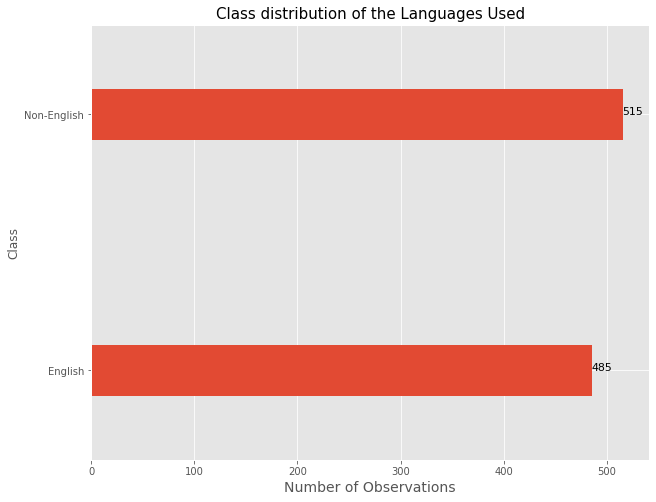

In [104]:
subplot = class_dist.groupby('Class')['Num_Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8))
subplot.set_title('Class distribution of the Languages Used', fontsize = 15)
subplot.set_xlabel('Number of Observations', fontsize = 14)
for i in subplot.patches:
    subplot.text(i.get_width() + 0.1, i.get_y() + 0.1, str(i.get_width()), fontsize=11)

# MIssing values are likely to create issues later on

In [105]:
lgdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Watch time(Minutes),1000.0,4.184279e+08,5.496355e+08,122192850.0,1.631899e+08,234990787.5,4.337399e+08,6.196162e+09
Stream time(minutes),1000.0,1.205152e+05,8.537620e+04,3465.0,7.375875e+04,108240.0,1.418438e+05,5.214450e+05
Peak viewers,1000.0,3.706505e+04,6.031431e+04,496.0,9.113750e+03,16676.0,3.756975e+04,6.393750e+05
Average viewers,1000.0,4.781040e+03,8.453685e+03,235.0,1.457750e+03,2425.0,4.786250e+03,1.476430e+05
Followers,1000.0,5.700541e+05,8.044134e+05,3660.0,1.705462e+05,318063.0,6.243322e+05,8.938903e+06
Followers gained,1000.0,2.055185e+05,3.399137e+05,-15772.0,4.375825e+04,98352.0,2.361308e+05,3.966525e+06
Views gained,1000.0,1.166817e+07,2.490572e+07,175788.0,3.880602e+06,6456323.5,1.219676e+07,6.701375e+08


In [106]:
lgdata.info

<bound method DataFrame.info of               Channel  Watch time(Minutes)  Stream time(minutes)  \
0               xQcOW           6196161750                215250   
1            summit1g           6091677300                211845   
2              Gaules           5644590915                515280   
3            ESL_CSGO           3970318140                517740   
4                Tfue           3671000070                123660   
..                ...                  ...                   ...   
995         LITkillah            122524635                 13560   
996  빅헤드 (bighead033)            122523705                153000   
997    마스카 (newmasca)            122452320                217410   
998     AndyMilonakis            122311065                104745   
999              Remx            122192850                 99180   

     Peak viewers  Average viewers  Followers  Followers gained  Views gained  \
0          222720            27716    3246298           1734810      9

# The lack of missing values means we can proceed

In [107]:
lgdata

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Non-English
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Non-English
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Non-English
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Non-English
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


In [108]:
lgdata = lgdata.drop(['Channel','Watch time(Minutes)','Stream time(minutes)','Followers gained','Views gained','Followers gained','Views gained'], axis = 1)

In [109]:
lgdata

,Peak viewers,Average viewers,Followers,Partnered,Mature,Language
0,222720,27716,3246298,True,False,English
1,310998,25610,5310163,True,False,English
2,387315,10976,1767635,True,True,Non-English
3,300575,7714,3944850,True,False,English
4,285644,29602,8938903,True,False,English
...,...,...,...,...,...,...
995,21359,9104,601927,True,False,Non-English
996,3940,793,213212,True,False,Non-English
997,6431,567,109068,True,False,Non-English
998,10543,1153,547446,True,False,English


In [110]:
lgdata.head().T

,0,1,2,3,4
Peak viewers,222720,310998,387315,300575,285644
Average viewers,27716,25610,10976,7714,29602
Followers,3246298,5310163,1767635,3944850,8938903
Partnered,True,True,True,True,True
Mature,False,False,True,False,False
Language,English,English,Non-English,English,English


# Convert values to binary data

In [111]:
lgdata['Mature'] = lgdata['Mature'].replace([True], 1)
lgdata['Mature'] = lgdata['Mature'].replace([False], 0)

A  1 represents a True and a 0 represents a False

In [112]:
lgdata['Partnered'] = lgdata['Partnered'].replace([True], 1)
lgdata['Partnered'] = lgdata['Partnered'].replace([False], 0)

A  1 represents a True and a 0 represents a False

In [113]:
lgdata['Language'] = lgdata['Language'].replace(['English'], 1)
lgdata['Language'] = lgdata['Language'].replace(['Non-English'], 0)

A 1 represents an English-speaking streamer  and 0 a non-English speaking streamer

In [114]:
lgdata['Followers'].where(lgdata['Followers'] > 1000000, 0, inplace=True)
lgdata['Followers'].where(lgdata['Followers'] <= 1000000, 1, inplace=True)

A 1 represents values equal to or above 1,000,000 and 0 represents values lower than 1,000,000

In [115]:
lgdata['Peak viewers'].where(lgdata['Peak viewers'] > 100000, 0, inplace=True)
lgdata['Peak viewers'].where(lgdata['Peak viewers'] <= 100000, 1, inplace=True)

A 1 represents values equal to or above 100,000 and 0 represents values lower than 100,000

In [116]:
lgdata['Average viewers'].where(lgdata['Average viewers'] > 10000, 0, inplace=True)
lgdata['Average viewers'].where(lgdata['Average viewers'] <= 10000, 1, inplace=True)

A 1 represents values equal to or above 10,000 and 0 represents values lower than 10,000

In [117]:
lgdata

,Peak viewers,Average viewers,Followers,Partnered,Mature,Language
0,1,1,1,1,0,1
1,1,1,1,1,0,1
2,1,1,1,1,1,0
3,1,0,1,1,0,1
4,1,1,1,1,0,1
...,...,...,...,...,...,...
995,0,0,0,1,0,0
996,0,0,0,1,0,0
997,0,0,0,1,0,0
998,0,0,0,1,0,1


In [118]:
lgdata.head().T

,0,1,2,3,4
Peak viewers,1,1,1,1,1
Average viewers,1,1,1,0,1
Followers,1,1,1,1,1
Partnered,1,1,1,1,1
Mature,0,0,1,0,0
Language,1,1,0,1,1


In [119]:
lgdata['Followers'].unique

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Followers, Length: 1000, dtype: int64>

In [120]:
lgdata.isna().sum()

Peak viewers       0
Average viewers    0
Followers          0
Partnered          0
Mature             0
Language           0
dtype: int64

# Split the Dataset in accordance with the 80:20 rule

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X=lgdata.iloc[:,0:30].values.astype(int)

In [123]:
X

array([[1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0]])

In [124]:
y=lgdata.iloc[:,5].values.astype(int)

In [125]:
y

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,

In [126]:
y.shape

(1000,)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=np.random.seed(7))

In [128]:
X_train.shape

(800, 6)

In [129]:
X_test.shape

(200, 6)

# Creating a LOgistic Regression Model

In [130]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.linear_model import LogisticRegression
import wandb 
import time 

# Creating a reusable utility function that can be beneficial in the future

In [131]:
def train_eval_pipeline(model, train_data, test_data, name):
    #initialize wandb
    wandb.init(project = 'Machine Learning for Detecting Twitch Channel Language', name=name)
    #assign the data
    (X_train, y_train)=train_data
    (X_test, y_test)=test_data

    #Train the model
    start=time.time()
    model.fit(X_train, y_train)
    end=time.time()-start
    prediction=model.predict(X_test)

    wandb.log({"accuracy":accuracy_score(y_test, prediction)*100, "precision":precision_recall_fscore_support(y_test, prediction, average='macro')[0], "recall":precision_recall_fscore_support(y_test, prediction, average='macro')[1], "training time": end})
    print("Accuracy Score of the Logistic Regression Classifier with default hyperparameter values {0:.2f}%".format(accuracy_score(y_test, prediction)*100.))
    print("\n")
    print("---Classification report of the Logistic Regression Classifier with default parameter values---")
    print("\n")
    print(classification_report(y_test, prediction, target_names=["English", "Non-English"]))

In [132]:
logreg = LogisticRegression()

In [133]:
logreg

LogisticRegression()

In [154]:
train_eval_pipeline(logreg, (X_train, y_train), (X_test, y_test), "Logistic_Regression_Twitch_Channel_Language")

accuracy,100.0
precision,1.0
recall,1.0
training time,0.003
_runtime,3
_timestamp,1633812165
_step,0


accuracy,▁
precision,▁
recall,▁
training time,▁
_runtime,▁
_timestamp,▁
_step,▁


wandb: wandb version 0.12.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Accuracy Score of the Logistic Regression Classifier with default hyperparameter values 100.00%


---Classification report of the Logistic Regression Classifier with default parameter values---


              precision    recall  f1-score   support

     English       1.00      1.00      1.00       109
 Non-English       1.00      1.00      1.00        91

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# Can we improve the model?

## A good way to start approaching is to tune the hyperparameters of the model. We need to define the grid of the values of the hyperparameters that we need to tune. We will use the random searchfor hyperparameter tuning.

# Import GridSearchCV

In [135]:
from sklearn.model_selection import RandomizedSearchCV

# Define the grid of values

In [136]:
penalty = ["l1", "l2"]

In [137]:
C = [0.8, 0.9, 1.0]

In [138]:
tol = [0.01, 0.001, 0.0001]

In [139]:
max_iter = [100, 150, 200, 250]

# Create a dictionary where tol and max_iter are keys and lists of their values
# are the corresponding values

In [140]:
param_grid = dict(penalty = penalty, C = C, tol = tol, max_iter = max_iter)

# Now that we have the grid, we look for a set of hyperparameter values.

# We instantiate RandomizedSearchCV with the search paramaters

In [141]:
random_model = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv=5)

# Fit the model to the data

In [142]:
random_model_results= random_model.fit(X_train, y_train)

# Summarize the results

In [143]:
best_score, best_params = random_model_results.best_score_,random_model_results.best_params_

In [144]:
print('Best score: %.2f using %s'%(best_score*100., best_params))

Best score: 100.00 using {'tol': 0.01, 'penalty': 'l2', 'max_iter': 150, 'C': 0.8}


# Log the results of the hyperparameter in wandb

In [145]:
config = wandb.config

In [146]:
config.tol = 0.01

In [147]:
config.penalty = "l2"

In [148]:
config.C = 1.0

# Train the model

In [149]:
logreg = LogisticRegression(tol=config.tol, penalty = config.penalty, max_iter = 250, C = config.C)

In [150]:
logreg

LogisticRegression(max_iter=250, tol=0.01)

In [157]:
train_eval_pipeline(logreg, (X_train,y_train), (X_test,y_test), "Logistic-Regression-Random-Search")

accuracy,100.0
precision,1.0
recall,1.0
training time,0.003
_runtime,2
_timestamp,1633812202
_step,0


accuracy,▁
precision,▁
recall,▁
training time,▁
_runtime,▁
_timestamp,▁
_step,▁


wandb: wandb version 0.12.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Accuracy Score of the Logistic Regression Classifier with default hyperparameter values 100.00%


---Classification report of the Logistic Regression Classifier with default parameter values---


              precision    recall  f1-score   support

     English       1.00      1.00      1.00       109
 Non-English       1.00      1.00      1.00        91

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

